Dataset : https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?select=train.txt
        

# Text Transformation
In NLP, converting text to numbers is done using techniques like Bag of Words (BoW), TF-IDF, or word embeddings (e.g., Word2Vec, GloVe). These methods transform words or documents into numeric vectors so machine learning models can process them.

### 2. TFIDF: 

TF-IDF (Term Frequency–Inverse Document Frequency) is a technique to weigh the importance of words in a document relative to a corpus.
It increases with word frequency in a document but decreases with frequency across all documents, reducing common word weight.
This helps highlight unique, meaningful terms useful for NLP tasks like text classification or search.


Example Sentence (document): Cat Sat Mat

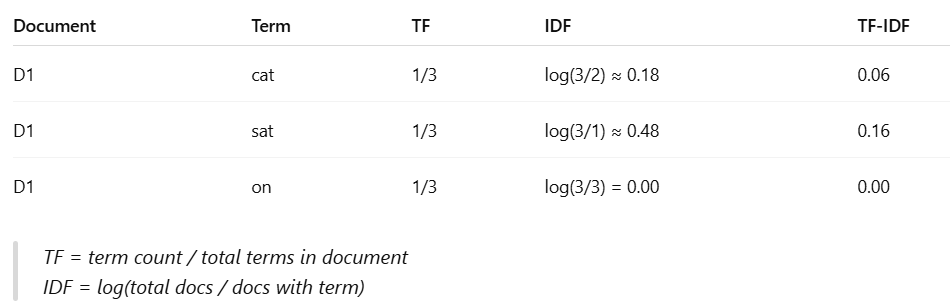

# Load Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.txt', sep=';', names=['Text', 'Emotion'],nrows=3000)

df.head()


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df['Emotion'].value_counts()

Emotion
joy         1035
sadness      847
anger        415
fear         341
love         242
surprise     120
Name: count, dtype: int64

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df['Text']  # text column
y = df['Emotion']  # label column (must be dense, 1D)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Feature Extraction (Transformmation) Using TFIDF


ngram_range	(1,2) includes unigrams and bigrams.

max_features	Limits vocabulary to top 1000 terms by TF-IDF score.

stop_words	Removes common English words like "the", "is", "and", etc.

lowercase	Converts all text to lowercase before tokenizing.

min_df	Ignores words that appear in fewer than 2 documents (filters rare terms).

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000, stop_words='english', lowercase=True, min_df=2)


X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
X_test_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44477778, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Model Training and Evaluation

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model correctly
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)  # Fixed here

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.91      0.59      0.71        87
        fear       0.94      0.48      0.63        65
         joy       0.68      0.95      0.79       206
        love       0.88      0.30      0.44        47
     sadness       0.75      0.88      0.81       176
    surprise       0.75      0.16      0.26        19

    accuracy                           0.75       600
   macro avg       0.82      0.56      0.61       600
weighted avg       0.78      0.75      0.72       600

[[ 51   0  23   0  13   0]
 [  2  31  14   0  18   0]
 [  0   1 195   1   9   0]
 [  1   0  26  14   6   0]
 [  2   1  17   1 154   1]
 [  0   0  10   0   6   3]]
